In [1]:
import cvxpy as cvx
import numpy as np
from scipy.integrate import quad as integral
from matplotlib import pyplot as plt

In [248]:
import cvxpy as cvx
import numpy as np
from scipy.integrate import quad as integral


def st(x , l) :
    return (x-l)*(x>l) + (x+l)*(x<-l)

n = 700
delta = 0.3
p = 0.1
m  = int(delta * n)
k = int(p * n)

A = np.random.randn(m,n) / n

print(np.linalg.norm(A))


0.546705054665


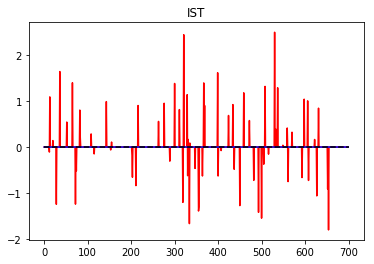

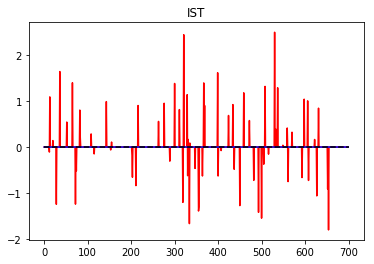

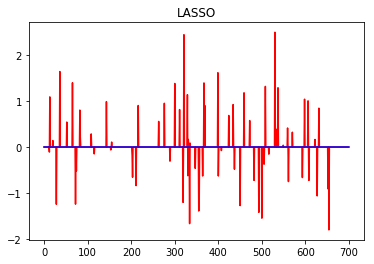

In [252]:

x = np.zeros(n)
S = np.random.choice(n,k, replace=False)
x[S] = np.random.randn(k)

y = np.matmul(A,x)


xt = np.zeros(n)
#rt = np.ones(m)
lmd = 0.6

max_itr = 2
c = np.linalg.norm(A) ** 2
for i in range(max_itr) :
    gt =  lmd / c / n
    bt = np.sum(np.abs(xt) > 1e-10)
    rt = y - np.matmul(A, xt) #+ bt * rt
    xt = st(xt + np.matmul(A.T, rt) / c, gt) 
    
    plt.plot(x,'r')
    plt.plot(xt,'b')
    plt.plot([0,n],[gt,gt] ,'--k')
    plt.title('IST')
    plt.show()

# Construct the problem.
x_hat = cvx.Variable(n)

objective = cvx.Minimize(0.5 * cvx.norm(A * x_hat - y)  + lmd*cvx.norm1(x_hat))
#constraints = [A * x_hat == y]

#prob = cvx.Problem(objective, constraints)
prob = cvx.Problem(objective)

result = prob.solve()

plt.plot(x, 'r')
plt.plot(x_hat.value, 'b')
plt.title('LASSO')
plt.show()



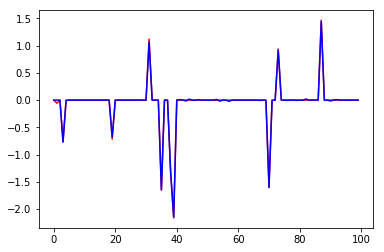

In [35]:
lmd = 0.6
# Construct the problem.
x_hat = cvx.Variable(n)

objective = cvx.Minimize(cvx.norm(A * x_hat - y)  + lmd*cvx.norm1(x_hat))
#constraints = [A * x_hat == y]

#prob = cvx.Problem(objective, constraints)
prob = cvx.Problem(objective)

result = prob.solve()

print(np.linalg.norm(x_hat.value - x))


In [165]:
np.linalg.norm(A)

12.16373081304263